In [1]:
import pandas as pd

confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21,12/6/21,12/7/21,12/8/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,...,156210,156250,156284,156307,156323,156363,156392,156397,156397,156397,156397,156414,156456,156487,156510,156552,156610,156649,156739,156739,156812,156864,156896,156911,157015,157032,157144,157171,157190,157218,157260,157289,157359,157387,157412,157431,157445,157499,157508,157542
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,184887,185300,185497,186222,186793,187363,187994,187994,189125,189355,190125,190815,191440,192013,192600,193075,193269,193856,194472,195021,195523,195988,195988,196611,197167,197776,198292,198732,199137,199555,199750,199945,200173,200639,201045,201402,201730,201902,202295,202641
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,206358,206452,206566,206649,206754,206878,206995,207079,207156,207254,207385,207509,207624,207764,207873,207970,208104,208245,208380,208532,208695,208839,208952,209111,209283,209463,209624,209817,209980,210152,210344,210531,210723,210921,211112,211297,211469,211662,211859,212047
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15516,15516,15516,15516,15572,15618,15618,15618,15618,15705,15717,15744,15744,15819,15819,15819,15907,15929,15972,16035,16086,16086,16086,16299,16342,16426,16566,16712,16712,16712,16712,17115,17426,17658,18010,18010,18010,18631,18815,18815
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,64374,64433,64458,64487,64533,64583,64612,64654,64674,64724,64762,64815,64857,64875,64899,64913,64913,64940,64968,64985,64997,65011,65024,65033,65061,65080,65105,65130,65139,65144,65155,65168,65183,65208,65223,65244,65259,65259,65301,65332


In [2]:
confirmed.shape

(280, 691)

In [3]:
last_date = "12/2/21"

confirmed[last_date]

0       157387
1       200639
2       210921
3        17658
4        65208
        ...   
275    1266288
276     461157
277      10006
278     210220
279     136379
Name: 12/2/21, Length: 280, dtype: int64

In [4]:
confirmed["Country/Region"]

0             Afghanistan
1                 Albania
2                 Algeria
3                 Andorra
4                  Angola
              ...        
275               Vietnam
276    West Bank and Gaza
277                 Yemen
278                Zambia
279              Zimbabwe
Name: Country/Region, Length: 280, dtype: object

In [5]:
confirmed["Province/State"].unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Diamond Princess', 'Grand Princess', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Northwest Territories',
       'Nova Scotia', 'Nunavut', 'Ontario', 'Prince Edward Island',
       'Quebec', 'Repatriated Travellers', 'Saskatchewan', 'Yukon',
       'Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin',
       'Tibet', 'Unknown', 'Xinjiang', 'Yunnan', 'Zhejiang',
       'Faroe Islands', 'Greenland', 'French Guiana', 'French Polynesia',
       'Guadeloupe', 'Martiniq

In [6]:
#linhas
confirmed.iloc[1]

Province/State        NaN
Country/Region    Albania
Lat               41.1533
Long              20.1683
1/22/20                 0
                   ...   
12/4/21            201402
12/5/21            201730
12/6/21            201902
12/7/21            202295
12/8/21            202641
Name: 1, Length: 691, dtype: object

In [7]:
#índices
confirmed.set_index("Province/State").loc["Anhui"]

Country/Region      China
Lat               31.8257
Long              117.226
1/22/20                 1
1/23/20                 9
                   ...   
12/4/21              1008
12/5/21              1008
12/6/21              1008
12/7/21              1008
12/8/21              1008
Name: Anhui, Length: 690, dtype: object

In [8]:
 # valor falso pois o erro é muito grande
 # não vou considerar essa analise pois tem muito campo vazio (muita disparidade no padrão)

confirmed["Country/Region"].value_counts()

China                 34
Canada                16
France                12
United Kingdom        12
Australia              8
                      ..
Micronesia             1
Senegal                1
Sri Lanka              1
Syria                  1
West Bank and Gaza     1
Name: Country/Region, Length: 196, dtype: int64

In [9]:
confirmed_by_country = confirmed.groupby("Country/Region").sum()

confirmed_by_country.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21,12/6/21,12/7/21,12/8/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,...,156210,156250,156284,156307,156323,156363,156392,156397,156397,156397,156397,156414,156456,156487,156510,156552,156610,156649,156739,156739,156812,156864,156896,156911,157015,157032,157144,157171,157190,157218,157260,157289,157359,157387,157412,157431,157445,157499,157508,157542
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,184887,185300,185497,186222,186793,187363,187994,187994,189125,189355,190125,190815,191440,192013,192600,193075,193269,193856,194472,195021,195523,195988,195988,196611,197167,197776,198292,198732,199137,199555,199750,199945,200173,200639,201045,201402,201730,201902,202295,202641
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,206358,206452,206566,206649,206754,206878,206995,207079,207156,207254,207385,207509,207624,207764,207873,207970,208104,208245,208380,208532,208695,208839,208952,209111,209283,209463,209624,209817,209980,210152,210344,210531,210723,210921,211112,211297,211469,211662,211859,212047
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15516,15516,15516,15516,15572,15618,15618,15618,15618,15705,15717,15744,15744,15819,15819,15819,15907,15929,15972,16035,16086,16086,16086,16299,16342,16426,16566,16712,16712,16712,16712,17115,17426,17658,18010,18010,18010,18631,18815,18815
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,64374,64433,64458,64487,64533,64583,64612,64654,64674,64724,64762,64815,64857,64875,64899,64913,64913,64940,64968,64985,64997,65011,65024,65033,65061,65080,65105,65130,65139,65144,65155,65168,65183,65208,65223,65244,65259,65259,65301,65332


In [10]:
confirmed_by_country.sample(10)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21,12/6/21,12/7/21,12/8/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Guinea-Bissau,11.803700,-15.180400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6133,6134,6134,6134,6137,6149,6150,6150,6150,6150,6150,6203,6263,6301,6363,6402,6402,6431,6432,6434,6434,6434,6434,6434,6437,6438,6438,6439,6440,6440,6440,6440,6442,6442,6444,6444,6444,6444,6444,6445
Belize,17.189900,-88.497600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,26798,26798,27149,27305,27523,27673,27894,27894,27894,28162,28162,28568,28749,28899,28899,28899,29105,29269,29386,29501,29501,29501,29501,29682,29861,29967,30060,30165,30165,30165,30338,30431,30517,30618,30680,30680,30680,30824,30888,30930
Saint Kitts and Nevis,17.357822,-62.782998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2669,2669,2675,2686,2696,2701,2708,2708,2717,2717,2717,2730,2735,2736,2745,2749,2749,2753,2756,2764,2764,2764,2766,2767,2774,2774,2774,2777,2779,2782,2782,2786,2786,2787,2789,2789,2790,2790,2791,2791
Kyrgyzstan,41.204380,74.766098,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,181186,181259,181327,181499,181499,181590,181668,181764,181830,181882,181936,181982,182090,182197,182267,182341,182425,182528,182605,182667,182727,182780,182833,182884,182953,182996,183066,183140,183207,183248,183285,183351,183404,183460,183510,183573,183615,183649,183712,183744
Iraq,33.223191,43.679291,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,5,7,7,...,2054202,2055248,2056401,2057716,2058914,2060066,2061222,2061939,2062863,2064011,2065127,2066042,2066905,2067797,2068388,2069247,2070076,2070883,2071689,2072478,2073267,2073835,2074419,2075248,2076146,2076922,2077665,2078521,2079084,2079622,2080448,2081172,2082061,2082774,2083515,2083889,2084346,2084961,2085586,2086192
Mauritania,21.007900,-10.940800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,37275,37320,37368,37435,37489,37535,37608,37659,37703,37755,37755,37884,37941,38001,38069,38133,38188,38278,38358,38440,38515,38583,38647,38699,38796,38881,38950,39035,39115,39178,39213,39266,39339,39408,39468,39510,39558,39584,39621,39669
Poland,51.919400,19.145100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3018100,3025247,3030151,3034668,3045102,3060613,3076518,3091713,3104220,3111534,3125179,3143725,3162804,3175769,3190067,3204515,3214023,3230634,3254875,3279787,3303046,3326464,3345388,3357763,3377698,3406129,3434272,3461066,3487254,3507828,3520961,3540061,3569137,3596491,3623452,3649027,3671421,3684671,3704040,3732589
Cuba,21.521757,-77.781167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,951325,952001,952634,953183,953750,954342,954948,955498,955981,956452,956919,957332,957735,958097,958390,958738,959064,959307,959553,959869,960185,960472,960802,961042,961276,961458,961698,961884,962067,962220,962350,962486,962628,962778,962892,963002,963090,963194,963269,963347
Sierra Leone,8.460555,-11.779889,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6397,6397,6398,6398,6398,6398,6398,6398,6398,6398,6398,6398,6400,6400,6400,6400,6400,6400,6400,6400,6400,6400,6400,6400,6400,6400,6400,6401,6401,6401,6402,6402,6402,6402,64

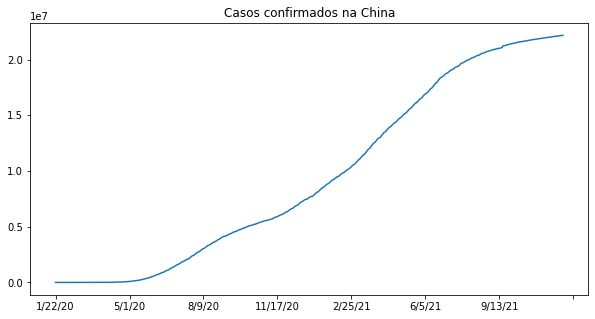

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
confirmed_by_country.loc["Brazil"][2:].plot()
plt.title("Casos confirmados na China")
plt.show()

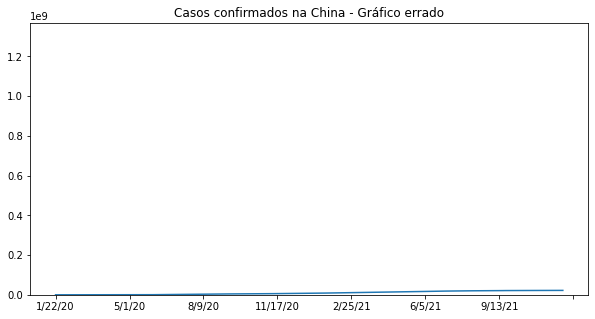

In [12]:
# mensagem diferente utilizando a população como referência
# população china 2017 (1.368 bi)

plt.figure(figsize=(10,5))
confirmed_by_country.loc["Brazil"][2:].plot()
plt.title("Casos confirmados na China - Gráfico errado")
plt.ylim(0, 1368000000)
plt.show()

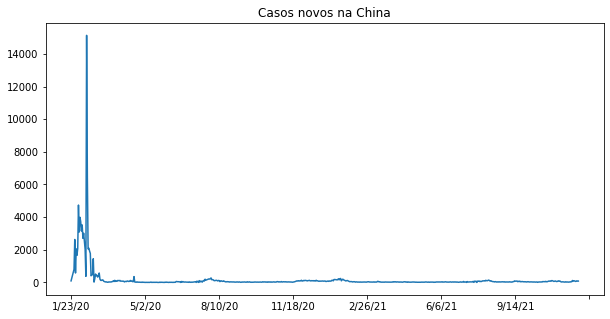

In [13]:
new_cases_china = confirmed_by_country.loc["China"][2:].diff().dropna()


plt.figure(figsize=(10,5))
plt.title("Casos novos na China")
new_cases_china.plot()

Text(0.5, 1.0, 'Casos confirmados por país')

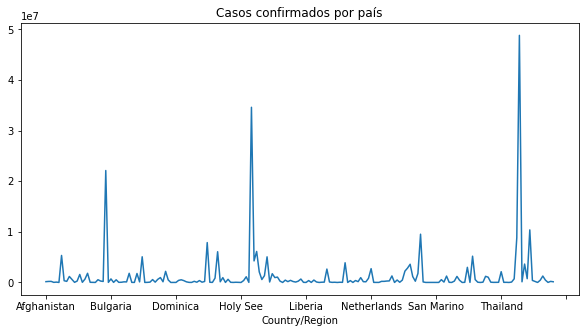

In [14]:
plt.figure(figsize=(10,5))

confirmed_by_country[last_date].plot()
plt.title("Casos confirmados por país")

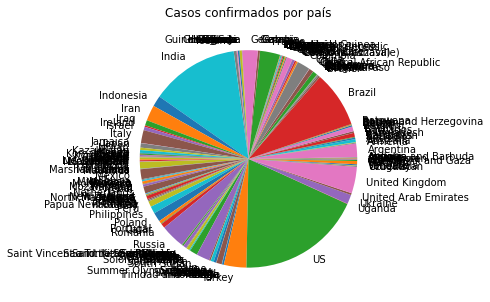

In [15]:
plt.figure(figsize=(10,5))

#99.99% não se usa gráfico de pizza e torta
# 1. muitas categorias é inviavel
# 2. poucas categorias, é uma comparação de area!

confirmed_by_country[last_date].plot(kind='pie')
plt.title("Casos confirmados por país")
plt.show()

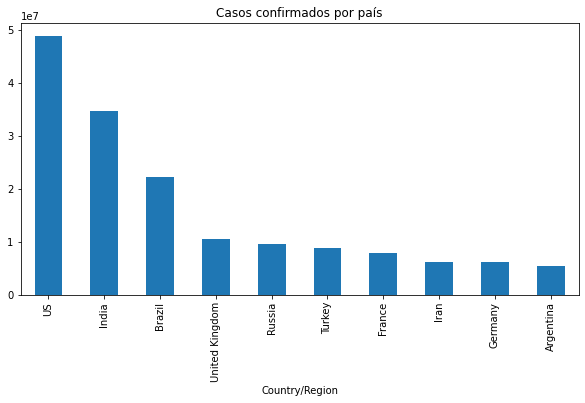

In [16]:
plt.figure(figsize=(10,5))

confirmed_by_country[last_date].sort_values(ascending=False)[0:10].plot(kind='bar')
plt.title("Casos confirmados por país")
plt.show()

Estados Unidos lidera em número de casos confirmados, seguidos por India e Brasil

In [17]:
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")


display(deaths)
display(recovered)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21,12/6/21,12/7/21,12/8/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7272,7280,7281,7281,7284,7284,7284,7284,7284,7288,7290,7291,7292,7292,7292,7293,7294,7295,7297,7297,7299,7301,7303,7303,7305,7306,7307,7307,7308,7308,7308,7308,7309,7310,7311,7312,7312,7316,7317,7317
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2916,2924,2931,2937,2940,2944,2948,2948,2955,2966,2970,2975,2978,2983,2986,2990,2997,3004,3014,3022,3029,3035,3035,3049,3053,3063,3068,3077,3085,3089,3092,3096,3101,3104,3108,3109,3110,3115,3122,3126
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5918,5920,5924,5927,5931,5936,5939,5941,5945,5950,5954,5960,5966,5971,5977,5984,5991,5997,6005,6009,6015,6017,6021,6026,6030,6035,6041,6046,6052,6058,6064,6071,6076,6083,6089,6096,6103,6111,6114,6122
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,131,131,131,131,131,131,131,131,132,132,132,132,133,133,133
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1708,1710,1713,1713,1716,1718,1719,1719,1720,1721,1723,1723,1725,1726,1727,1727,1727,1729,1729,1729,1729,1730,1730,1730,1730,1731,1732,1733,1733,1733,1733,1733,1735,1735,1735,1735,1735,1735,1735,1735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,22030,22083,22131,22205,22283,22342,22412,22470,22531,22598,22686,22765,22849,22930,23018,23082,23183,23270,23337,23476,23578,23685,23761,23951,24118,24243,24407,24544,24692,24882,25055,25252,25448,25658,25858,26061,26260,26483,26700,26930
276,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4663,4663,4681,4689,4694,4697,4705,4705,4705,4724,4731,4733,4737,4743,4743,4743,4754,4761,4764,4767,4770,4770,4770,4779,4781,4783,4788,4789,4789,4789,4796,4796,4803,4806,4810,4810,4810,4817,4822,4823
277,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1880,1889,1890,1894,1897,1901,1905,1907,1909,1909,1915,1918,1920,1921,1923,1923,1926,1926,1929,1934,1935,1938,1938,1939,1942,1942,1943,1943,1945,1946,1949,1950,1950,1950,1952,1953,1954,1955,1955,1956
278,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3661,3661,3661,3661,3661,3662,3662,3663,3664,3664,3664,3664,3664,3664,3664,3666,3666,3666,3666,3666,3667,3667,3667,3667,3667,3667,3667,3667,3667,3667,3667,3667,3667,3667,3667,3667,3667,3668,3668,3668


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21,12/6/21,12/7/21,12/8/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,6,6,7,7,7,7,7,7,7,7,14,14,14,14,16,16,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
263,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
def latest_by_country(data):
  return data.groupby("Country/Region").sum().iloc[:,-1]


display(latest_by_country(confirmed).head())
display(latest_by_country(deaths).head())
display(latest_by_country(recovered).head())

Country/Region
Afghanistan    157542
Albania        202641
Algeria        212047
Andorra         18815
Angola          65332
Name: 12/8/21, dtype: int64

Country/Region
Afghanistan    7317
Albania        3126
Algeria        6122
Andorra         133
Angola         1735
Name: 12/8/21, dtype: int64

Country/Region
Afghanistan    0
Albania        0
Algeria        0
Andorra        0
Angola         0
Name: 12/8/21, dtype: int64

In [19]:
informations = [latest_by_country(confirmed), latest_by_country(deaths), latest_by_country(recovered)]
combined = pd.concat(informations, axis=1)
combined.columns = ['confirmed', 'deaths', 'recovered']
combined

,confirmed,deaths,recovered
Country/Region,,,
Afghanistan,157542,7317,0
Albania,202641,3126,0
Algeria,212047,6122,0
Andorra,18815,133,0
Angola,65332,1735,0
...,...,...,...
Vietnam,1352122,26930,0
West Bank and Gaza,462958,4823,0
Yemen,10047,1956,0


In [20]:
# taxa de letalidade é expressa em %
# o número de casos letais dentro dfos casos que foram letais e não letais

# muito dificil falar de letalidade tentando ser preciso durante uma epidemia

# no começo é comum que somente casos graves sejam reportados

sum_up = combined.sum()
letality_rate_1 = sum_up["deaths"] / sum_up["confirmed"]
letality_rate_2 = sum_up["deaths"] / (sum_up['deaths']+sum_up['recovered'])
print(letality_rate_1 * 100)
print(letality_rate_2 * 100)


1.971102823143307
100.0


In [21]:
# escolhendo a data para calcular as taxas

def latest_by_country_at(data, date):
  return data.groupby("Country/Region").sum()[date]

informations = [latest_by_country_at(confirmed, '12/1/21'), latest_by_country_at(deaths, '12/1/21'), latest_by_country_at(recovered, '12/1/21')]
combined_12_21 = pd.concat(informations, axis=1)
combined_12_21.columns = ['confirmed', 'deaths', 'recovered']

sum_up = combined_12_21.sum()
letality_rate_1 = sum_up["deaths"] / sum_up["confirmed"]
letality_rate_2 = sum_up["deaths"] / (sum_up['deaths']+sum_up['recovered'])
print(letality_rate_1 * 100)
print(letality_rate_2 * 100)

1.9828760757345867
100.0


In [22]:
letality_rate_1 = combined['deaths'] / combined['confirmed'] * 100
letality_rate_2 = combined['deaths'] / combined["recovered"] + combined["deaths"] * 100
combined['letality_rate_1'] = letality_rate_1
combined['letality_rate_2'] = letality_rate_2

combined.head()

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Afghanistan,157542,7317,0,4.644476,inf
Albania,202641,3126,0,1.542630,inf
Algeria,212047,6122,0,2.887096,inf
Andorra,18815,133,0,0.706883,inf
Angola,65332,1735,0,2.655666,inf


In [23]:
combined.sort_values("letality_rate_1", ascending = False).head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
MS Zaandam,9,2,0,22.222222,inf
Yemen,10047,1956,0,19.468498,inf
Vanuatu,6,1,0,16.666667,inf
Peru,2246633,201450,0,8.966752,inf
Mexico,3905319,295602,0,7.569215,inf
Sudan,44406,3201,0,7.208485,inf
Ecuador,530126,33494,0,6.318121,inf
Somalia,23051,1331,0,5.774153,inf
Syria,48901,2793,0,5.711540,inf


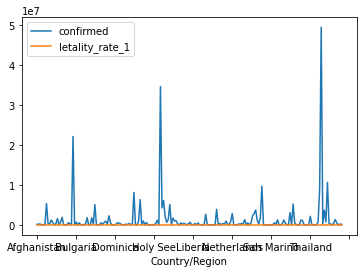

In [24]:
# visualização ruim

combined[["confirmed", 'letality_rate_1']].plot()

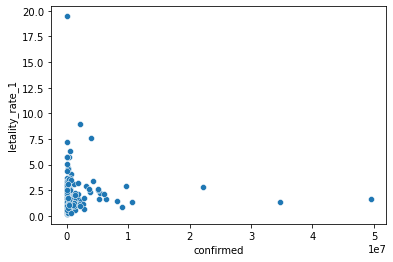

In [25]:
import seaborn as sns

sns.scatterplot(data=combined.query("confirmed > 10000"), x ='confirmed', y='letality_rate_1')

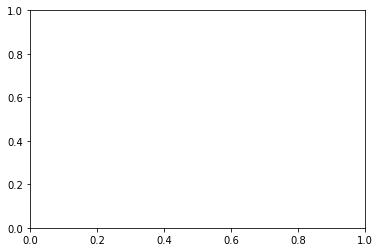

In [26]:
sns.scatterplot(data=combined.query("recovered > 50"), x ='confirmed', y='letality_rate_2')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


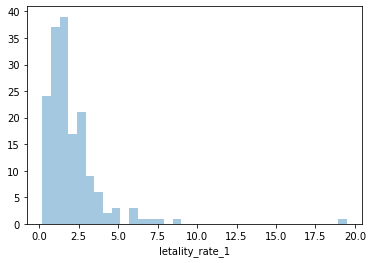

In [27]:
sns.distplot(combined.query("confirmed > 10000")['letality_rate_1'], kde=False)

In [28]:
combined.sort_values("letality_rate_1", ascending = False).query("confirmed > 10000").head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Yemen,10047,1956,0,19.468498,inf
Peru,2246633,201450,0,8.966752,inf
Mexico,3905319,295602,0,7.569215,inf
Sudan,44406,3201,0,7.208485,inf
Ecuador,530126,33494,0,6.318121,inf
Somalia,23051,1331,0,5.774153,inf
Syria,48901,2793,0,5.711540,inf
Egypt,365831,20877,0,5.706733,inf
Taiwan*,16688,848,0,5.081496,inf


# Segunda parte

In [29]:
confirmed.set_index("Country/Region").loc["China"].sum().tail()

12/4/21    111671
12/5/21    111741
12/6/21    111840
12/7/21    111919
12/8/21    112002
dtype: object

In [30]:
is_china = confirmed["Country/Region"] == "China"
is_china.head()

0    False
1    False
2    False
3    False
4    False
Name: Country/Region, dtype: bool

In [31]:
confirmed['is_china'] = is_china
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21,12/6/21,12/7/21,12/8/21,is_china
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,...,156250,156284,156307,156323,156363,156392,156397,156397,156397,156397,156414,156456,156487,156510,156552,156610,156649,156739,156739,156812,156864,156896,156911,157015,157032,157144,157171,157190,157218,157260,157289,157359,157387,157412,157431,157445,157499,157508,157542,False
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,185300,185497,186222,186793,187363,187994,187994,189125,189355,190125,190815,191440,192013,192600,193075,193269,193856,194472,195021,195523,195988,195988,196611,197167,197776,198292,198732,199137,199555,199750,199945,200173,200639,201045,201402,201730,201902,202295,202641,False
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,206452,206566,206649,206754,206878,206995,207079,207156,207254,207385,207509,207624,207764,207873,207970,208104,208245,208380,208532,208695,208839,208952,209111,209283,209463,209624,209817,209980,210152,210344,210531,210723,210921,211112,211297,211469,211662,211859,212047,False
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15516,15516,15516,15572,15618,15618,15618,15618,15705,15717,15744,15744,15819,15819,15819,15907,15929,15972,16035,16086,16086,16086,16299,16342,16426,16566,16712,16712,16712,16712,17115,17426,17658,18010,18010,18010,18631,18815,18815,False
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,64433,64458,64487,64533,64583,64612,64654,64674,64724,64762,64815,64857,64875,64899,64913,64913,64940,64968,64985,64997,65011,65024,65033,65061,65080,65105,65130,65139,65144,65155,65168,65183,65208,65223,65244,65259,65259,65301,65332,False


In [32]:
confirmed.query("is_china == True")

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21,12/6/21,12/7/21,12/8/21,is_china
58,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,...,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,True
59,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,400,...,1162,1164,1173,1173,1173,1173,1174,1175,1176,1177,1179,1183,1185,1185,1185,1186,1187,1190,1190,1190,1191,1191,1191,1191,1191,1191,1191,1191,1191,1191,1191,1191,1194,1194,1194,1194,1195,1195,1195,True
60,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573,575,576,576,576,...,604,604,608,609,609,609,609,610,610,610,610,610,610,610,610,610,610,610,610,610,610,610,610,610,610,610,610,610,610,610,610,610,610,610,610,610,610,610,610,True
61,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293,293,293,294,294,...,1306,1308,1308,1308,1308,1311,1312,1313,1314,1314,1314,1315,1316,1316,1318,1318,1318,1318,1318,1319,1319,1319,1319,1319,1320,1320,1320,1320,1320,1321,1322,1322,1322,1322,1322,1323,1323,1326,1327,True
62,Gansu,China,35.7518,104.2861,0,2,2,4,7,14,19,24,26,29,40,51,55,57,62,62,67,79,83,83,86,87,90,90,90,90,91,91,91,91,91,91,91,91,91,91,...,305,313,327,329,334,336,338,340,344,344,344,344,344,344,344,344,344,344,344,344,344,344,344,344,344,344,344,344,344,344,344,344,344,344,344,344,344,344,344,True
63,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,207,277,354,436,535,632,725,813,895,970,1034,1095,1131,1159,1177,1219,1241,1261,1294,1316,1322,1328,1331,1332,1333,1339,1342,1345,1347,1347,...,3224,3226,3230,3233,3234,3237,3240,3243,3247,3248,3249,3251,3252,3253,3257,3259,3260,3264,3267,3269,3272,3274,3279,3281,3285,3291,3294,3297,3301,3310,3314,3315,3318,3322,3323,3324,3327,3330,3333,True
64,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,51,58,78,87,100,111,127,139,150,168,172,183,195,210,215,222,222,226,235,237,238,242,244,245,246,249,249,251,252,252,...,339,340,341,346,349,349,350,351,355,358,359,360,361,362,362,362,362,366,367,372,373,379,381,386,390,391,393,395,396,400,401,409,413,416,417,426,439,447,456,True
65,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,9,9,12,29,29,38,46,58,64,71,81,89,99,109,127,133,135,140,143,144,146,146,146,146,146,146,146,146,146,146,...,158,158,158,158,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,True
66,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,40,43,46,52,62,64,72,80,99,106,117,124,131,138,144,157,157,159,162,162,163,163,168,168,168,168,168,168,168,168,...,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,True
67,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,33,48,65,82,96,104,113,126,135,157,172,195,206,218,239,251,265,283,291,300,301,306,306,307,308,309,311,311,311,312,...,1330,1338,1352,1375,1385,1399,1415,1423,14

In [33]:
confirmed.groupby("is_china").sum()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21,12/6/21,12/7/21,12/8/21
is_china,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,4518.08725,2368.391714,9,12,21,28,43,50,69,80,94,125,147,157,171,191,203,218,289,316,332,415,425,470,486,551,639,722,836,941,1033,1135,1291,1601,1960,2309,2650,3215,4140,5200,...,246734327,247055087,247478061,247907438,248428552,248956246,249471538,249885895,250232982,250711407,251194446,251768760,252284754,252879352,253307932,253659584,254204355,254726206,255351034,255965633,256581063,257057858,257454146,258078858,258685466,259358193,259954177,260549106,260999738,261405596,262071415,262696704,263400264,264103947,264822105,265328859,265752109,266356218,267044340,267717760
True,1085.29230,3688.937700,548,643,920,1406,2075,2877,5509,6087,8141,9802,11891,16630,19716,23707,27440,30587,34110,36814,39829,42354,44386,44759,59895,66358,68413,70513,72434,74211,74619,75077,75550,77001,77022,77241,77754,78166,78600,78928,...,109574,109666,109738,109850,109956,110041,110102,110178,110268,110330,110385,110454,110553,110629,110720,110773,110801,110833,110871,110899,110923,110943,110983,111005,111033,111058,111077,111106,111132,111176,111218,111337,111413,111515,111608,111671,111741,111840,111919,112002


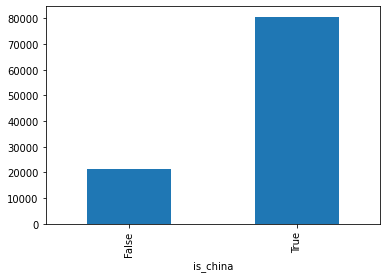

In [34]:
# Data em que a China possuía mais casos que o restante
confirmed.groupby("is_china").sum()['3/6/20'].plot(kind='bar')

# No dia 6/3/2020 a China tinha ~4 vezes o número de casos que o resto. No entanto isso é um resumo de informações, e com isso, perdemos elas.

No entanto, olhar uma fotografia é muito limitado, queremos ver também como foi o crescimento.

In [35]:
import numpy as np

confirmed['is_china_label'] = np.where(confirmed["is_china"], "China", 'Others')
display(confirmed.head())
display(confirmed.tail())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21,12/6/21,12/7/21,12/8/21,is_china,is_china_label
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,...,156284,156307,156323,156363,156392,156397,156397,156397,156397,156414,156456,156487,156510,156552,156610,156649,156739,156739,156812,156864,156896,156911,157015,157032,157144,157171,157190,157218,157260,157289,157359,157387,157412,157431,157445,157499,157508,157542,False,Others
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,185497,186222,186793,187363,187994,187994,189125,189355,190125,190815,191440,192013,192600,193075,193269,193856,194472,195021,195523,195988,195988,196611,197167,197776,198292,198732,199137,199555,199750,199945,200173,200639,201045,201402,201730,201902,202295,202641,False,Others
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,206566,206649,206754,206878,206995,207079,207156,207254,207385,207509,207624,207764,207873,207970,208104,208245,208380,208532,208695,208839,208952,209111,209283,209463,209624,209817,209980,210152,210344,210531,210723,210921,211112,211297,211469,211662,211859,212047,False,Others
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15516,15516,15572,15618,15618,15618,15618,15705,15717,15744,15744,15819,15819,15819,15907,15929,15972,16035,16086,16086,16086,16299,16342,16426,16566,16712,16712,16712,16712,17115,17426,17658,18010,18010,18010,18631,18815,18815,False,Others
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,64458,64487,64533,64583,64612,64654,64674,64724,64762,64815,64857,64875,64899,64913,64913,64940,64968,64985,64997,65011,65024,65033,65061,65080,65105,65130,65139,65144,65155,65168,65183,65208,65223,65244,65259,65259,65301,65332,False,Others


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21,12/6/21,12/7/21,12/8/21,is_china,is_china_label
275,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,926720,932357,939463,946043,953547,961038,968684,976672,984805,992735,1000897,1009879,1018346,1026522,1035138,1045397,1055246,1065469,1075094,1084625,1094514,1104835,1143967,1155778,1168228,1181337,1197404,1210340,1224110,1238082,1252590,1266288,1280780,1294778,1309092,1323683,1337523,1352122,False,Others
276,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,453782,454172,454509,454799,455099,455099,455099,455689,455949,456186,456407,456632,456632,456632,457154,457390,457477,457729,457950,457950,457950,458448,458698,458956,459213,459479,459479,459479,460053,460053,460799,461157,461467,461467,461467,462219,462621,462958,False,Others
277,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9799,9806,9810,9831,9843,9858,9870,9883,9891,9902,9907,9912,9918,9918,9936,9936,9947,9950,9954,9955,9955,9961,9967,9972,9977,9979,9981,9987,9995,10004,10006,10006,10020,10021,10025,10034,10043,10047,False,Others
278,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,209739,209760,209781,209815,209852,209869,209902,209908,209918,209939,209953,209963,209971,209983,209996,210008,210020,210036,210043,210057,210070,210073,210090,210099,210112,210118,210138,210143,210150,210169,210195,210220,210262,210294,210312,210327,210374,210436,False,Others
279,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,133007,133047,133091,133112,133112,133168,133187,133205,133242,133302,133329,133329,133393,133428,133438,133505,133557,133593,133593,133615,133647,133674,133674,133747,133774,133836,133836,133951,134226,134625,135337,136379,137441,138523,139046,139046,141601,150628,False,Others


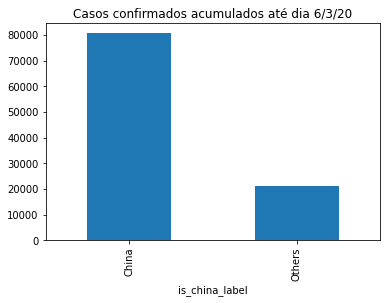

In [36]:
confirmed.groupby("is_china_label").sum()['3/6/20'].plot(kind='bar')
plt.title("Casos confirmados acumulados até dia 6/3/20")
plt.show()

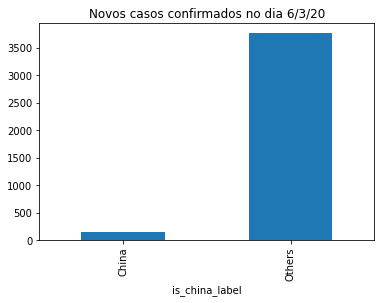

In [37]:
summed = confirmed.groupby("is_china_label").sum()
summed['delta'] = summed['3/6/20'] - summed['3/5/20']
summed['delta'].plot(kind='bar')
plt.title("Novos casos confirmados no dia 6/3/20")
plt.show()

In [38]:
summed.T

is_china_label,China,Others
Lat,1085.2923,4.518087e+03
Long,3688.9377,2.368392e+03
1/22/20,548.0000,9.000000e+00
1/23/20,643.0000,1.200000e+01
1/24/20,920.0000,2.100000e+01
...,...,...
12/6/21,111840.0000,2.663562e+08
12/7/21,111919.0000,2.670443e+08
12/8/21,112002.0000,2.677178e+08
is_china,34.0000,0.000000e+00


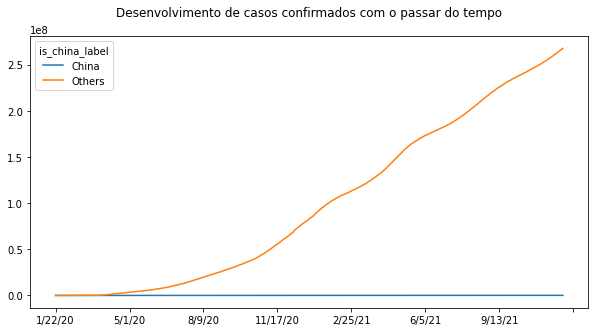

In [39]:
summed.T[2:-2].plot(figsize=(10,5))
plt.title("Desenvolvimento de casos confirmados com o passar do tempo", y=1.05)
plt.show()

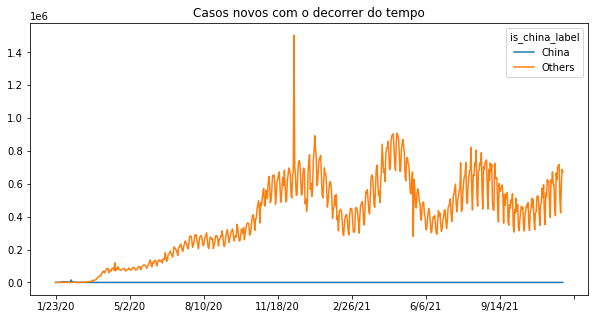

In [40]:
differences = summed.T[2:-2].diff().dropna()
differences.plot(figsize=(10,5))
plt.title("Casos novos com o decorrer do tempo")
plt.show()

In [41]:
cases = confirmed.groupby("is_china_label").sum()['3/6/20'].loc["China"]
estimated_population_china_2020 = 1447281587

incidence_ratio = cases / estimated_population_china_2020 * 100000
incidence_ratio

# essa é uma conta errada, pois estou usando uma população muito maior do que deveria estar usando,
# já que em 2020 não era a china inteira que estava sendo afetada pelo coronavirus

5.5752799403230435

In [42]:
un_population = pd.read_csv("https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_TotalPopulationBySex.csv")
un_population["PopTotal"] = un_population["PopTotal"] * 1000

un_population.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752117.0,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840151.0,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935996.0,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039684.0,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151316.0,12.486


In [43]:
un_population.describe()

,LocID,VarID,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
count,280932.000000,280932.000000,280932.000000,280932.000000,2.508760e+05,2.508760e+05,2.809320e+05,280932.000000
mean,703.125062,22.411345,2051.026494,2051.526494,2.324362e+05,2.298754e+05,4.128536e+08,426.659040
std,631.959759,55.972847,33.642148,33.642148,6.938837e+05,6.829825e+05,1.308911e+09,2418.990784
min,4.000000,2.000000,1950.000000,1950.500000,6.812000e+00,6.889000e+00,1.510000e+02,0.052000
25%,300.000000,2.000000,2031.000000,2031.500000,1.847834e+03,1.860604e+03,1.240100e+06,34.205250
50%,586.000000,5.000000,2055.000000,2055.500000,1.136849e+04,1.164585e+04,1.420555e+07,91.590000
75%,903.000000,9.000000,2078.000000,2078.500000,8.526402e+04,8.648854e+04,1.171661e+08,216.985750
max,5501.000000,207.000000,2100.000000,2100.500000,1.092000e+07,1.071273e+07,2.163274e+10,56025.839000


In [44]:
un_population_total = un_population.query("Time == 2019")[["Location", "PopTotal"]].set_index("Location")
un_population_total.head()

,PopTotal
Location,
Afghanistan,3.804176e+07
Africa,1.308064e+09
African Group,1.306321e+09
African Union,1.306903e+09
African Union: Central Africa,1.540137e+08


In [45]:
combined.join(un_population_total)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2,PopTotal
Afghanistan,157542,7317,0,4.644476,inf,38041757.0
Albania,202641,3126,0,1.542630,inf,2880913.0
Algeria,212047,6122,0,2.887096,inf,43053054.0
Andorra,18815,133,0,0.706883,inf,77146.0
Angola,65332,1735,0,2.655666,inf,31825299.0
...,...,...,...,...,...,...
Vietnam,1352122,26930,0,1.991684,inf,NaN
West Bank and Gaza,462958,4823,0,1.041779,inf,NaN
Yemen,10047,1956,0,19.468498,inf,29161922.0
Zambia,210436,3668,0,1.743048,inf,17861034.0


In [46]:
combined.join(un_population_total).sort_values("confirmed", ascending = False).head(20)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2,PopTotal
US,49538947,793228,0,1.601221,inf,NaN
India,34666241,474111,0,1.367645,inf,1.366418e+09
Brazil,22167781,616251,0,2.779940,inf,2.110495e+08
United Kingdom,10671538,146444,0,1.372286,inf,6.753016e+07
Russia,9722639,279280,0,2.872471,inf,NaN
Turkey,8966681,78407,0,0.874426,inf,8.342961e+07
France,8153025,121017,0,1.484320,inf,6.512973e+07
Germany,6339828,104201,0,1.643593,inf,8.351705e+07
Iran,6144644,130446,0,2.122922,inf,NaN
Argentina,5348123,116708,0,2.182224,inf,4.478068e+07


In [47]:
un_population_total.index[:5]

Index(['Afghanistan', 'Africa', 'African Group', 'African Union',
       'African Union: Central Africa'],
      dtype='object', name='Location')

In [48]:
def locate(population, country):
  return population.query(f"Location.str.contains('{country}') and Time == 2019", engine ='python')

locate(un_population, 'United States')

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
263406,850,United States Virgin Islands,2,Medium,2019,2019.5,49.704,54.875,104579.0,298.797
264290,840,United States of America,2,Medium,2019,2019.5,162826.299,166238.618,329064917.0,35.974
265174,1111,United States of America (and dependencies),2,Medium,2019,2019.5,164409.733,167972.987,332382720.0,36.295


In [49]:
# assumir algumas premissas
# UN China = Johns Hopkins China

def rename_location(location):
  if location == "Mainland China":
    return 'China'
  if location == 'Republic of Korea':
    return 'South Korea'
  if location == 'Iran (Islamic Republic of)':
    return 'Iran'
  if location == 'Russian Federation':
    return 'Russia'
  if location == 'United States of America':
    return 'US'
  return location



un_population_total["location_for_who"] = un_population_total.index.map(rename_location)

un_population_total.query("location_for_who == 'Iran'")


,PopTotal,location_for_who
Location,,
Iran (Islamic Republic of),82913893.0,Iran


In [50]:
un_population_total = un_population_total.set_index("location_for_who")
un_population_total.head()

,PopTotal
location_for_who,
Afghanistan,3.804176e+07
Africa,1.308064e+09
African Group,1.306321e+09
African Union,1.306903e+09
African Union: Central Africa,1.540137e+08


In [51]:
combined_expanded = combined.join(un_population_total).sort_values("confirmed", ascending = False).dropna()
combined_expanded.head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2,PopTotal
US,49538947,793228,0,1.601221,inf,3.290649e+08
India,34666241,474111,0,1.367645,inf,1.366418e+09
Brazil,22167781,616251,0,2.779940,inf,2.110495e+08
United Kingdom,10671538,146444,0,1.372286,inf,6.753016e+07
Russia,9722639,279280,0,2.872471,inf,1.458723e+08
Turkey,8966681,78407,0,0.874426,inf,8.342961e+07
France,8153025,121017,0,1.484320,inf,6.512973e+07
Germany,6339828,104201,0,1.643593,inf,8.351705e+07
Iran,6144644,130446,0,2.122922,inf,8.291389e+07
Argentina,5348123,116708,0,2.182224,inf,4.478068e+07


In [52]:
# o calculo de indicencia aqui tem que tomar cuidado, pois assumimos que população em rico na China é todo mundo
# mas em dado momento da pandeia, a grande maioria dos casos se concentrava em uma região específica

combined_expanded['incidente_ratio'] = combined_expanded['confirmed'] / combined_expanded["PopTotal"] * 100000
combined_expanded['mortality_ratio'] = combined_expanded['deaths'] / combined_expanded["PopTotal"] * 100000

combined_expanded.head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2,PopTotal,incidente_ratio,mortality_ratio
US,49538947,793228,0,1.601221,inf,3.290649e+08,15054.460212,241.055171
India,34666241,474111,0,1.367645,inf,1.366418e+09,2537.016286,34.697368
Brazil,22167781,616251,0,2.779940,inf,2.110495e+08,10503.592287,291.993558
United Kingdom,10671538,146444,0,1.372286,inf,6.753016e+07,15802.624845,216.857176
Russia,9722639,279280,0,2.872471,inf,1.458723e+08,6665.173351,191.455181
Turkey,8966681,78407,0,0.874426,inf,8.342961e+07,10747.600669,93.979827
France,8153025,121017,0,1.484320,inf,6.512973e+07,12518.130929,185.809151
Germany,6339828,104201,0,1.643593,inf,8.351705e+07,7591.058716,124.766147
Iran,6144644,130446,0,2.122922,inf,8.291389e+07,7410.873833,157.327072
Argentina,5348123,116708,0,2.182224,inf,4.478068e+07,11942.926273,260.621351


Penso em comparar com outro virus, como Influenza
, em outro pais, como Brasil, em outro estado, como Rio Grande do Sul,
 em outro período de 2019, em outro periódo de 1 ano inteiro versus 2 meses.

 Totalmente diferente, qual a chance da comparação ser justa e honesta?

 Fonte: https://www.cevs.rs.gov.br/informativos-epidemiologicos-2019

> O coeficiente de incidência entre os SRAG, está em 3,88/100.000 habitantes, o coeficiente de mortalidade (CM) está em 0,61/100.000 habitantes, enquanto que o CM nacional, na SE 46 foi de 0,50/100.000 habitantes. A letalidade no Estado está em 15,8%.

In [55]:
confirmed.sort_values(last_date, ascending=False).head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21,12/6/21,12/7/21,12/8/21,is_china,is_china_label
255,NaN,US,40.000000,-100.000000,1,1,2,2,5,5,5,6,6,8,8,8,11,11,11,12,12,12,12,12,13,13,14,14,14,14,14,14,14,14,16,16,16,16,16,16,...,46122948,46194029,46278614,46360436,46456541,46489437,46524743,46637056,46717357,46812332,46867831,47014360,47055324,47085614,47224576,47312202,47423606,47533702,47659290,47700783,47738554,47889042,47981453,48092823,48125425,48176523,48201079,48241903,48438882,48555980,48691359,48832234,48990133,49051146,49085361,49278278,49387208,49538947,False,Others
147,NaN,India,20.593684,78.962880,0,0,0,0,0,0,0,0,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,34296237,34308140,34321025,34333754,34344683,34355509,34366987,34377113,34388579,34401670,34414186,34426036,34437307,34447536,34456401,34466598,34478517,34489623,34499925,34510413,34518901,34526480,34535763,34544882,34555431,34563749,34572523,34580832,34587822,34596776,34606541,34615757,34624360,34624360,34641561,34648383,34656822,34666241,False,Others
30,NaN,Brazil,-14.235000,-51.925300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,21814693,21821124,21835785,21849137,21862458,21874324,21880439,21886077,21897025,21909298,21924598,21939196,21953838,21957967,21960766,21965684,21977661,21989962,22003317,22012150,22017276,22019870,22030182,22043112,22055238,22067630,22076863,22080906,22084749,22094459,22105872,22118782,22129409,22138247,22143091,22147476,22157726,22167781,False,Others
270,NaN,United Kingdom,55.378100,-3.436000,0,0,0,0,0,0,0,0,0,2,2,2,8,8,9,9,9,13,14,14,15,16,17,18,18,18,19,19,20,22,23,23,28,30,34,37,...,9097311,9130857,9171660,9208219,9241916,9272066,9301909,9333891,9366676,9406001,9448402,9487302,9524971,9561099,9600369,9637190,9675058,9721916,9766153,9806034,9845492,9889926,9932408,9974843,10021497,10070841,10110408,10146915,10189059,10228772,10276007,10329074,10379647,10421104,10464389,10515239,10560341,10610958,False,Others
217,NaN,Russia,61.524010,105.318756,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,8417305,8455232,8494589,8533706,8573323,8613533,8651561,8689818,8727817,8764713,8804297,8843238,8881306,8918926,8956136,8991748,9027163,9063318,9099253,9135149,9170898,9205431,9238330,9270885,9303751,9337575,9370694,9403480,9436650,9468640,9500836,9533593,9565909,9598283,9630296,9661865,9692411,9722639,False,Others


In [60]:
# Hubei é uma região da China onde no inicio da pandemia, mais de 80% dos casos se encontravam lá
# https://en.wikipedia.org/wiki/Hubei
# hubei population

hubei_population = 59020000
confirmed_cases = confirmed.set_index("Province/State").loc["Hubei"][last_date]
death_cases = deaths.set_index("Province/State").loc["Hubei"][last_date]
recovered_cases = recovered.set_index("Province/State").loc["Hubei"][last_date]

letality_rate_1 = death_cases / confirmed_cases * 100

print(f"Letality rate 1: {letality_rate_1}%")


Letality rate 1: 6.605085564550365%


In [62]:
# nos Estados Unidor de acordo com burden report de influenza 2018-2019 estimativa não final

letality_rate_hospitalization = 34157 / 490561 * 100 

print(f"Letality rate hospitalization EUA: {letality_rate_hospitalization}%")

Letality rate hospitalization EUA: 6.962844579980879%


In [64]:
letality_rate_medical_visit = 34157 / 16520350 * 100 

print(f"Letality rate medical visit EUA: {letality_rate_medical_visit}%")

Letality rate medical visit EUA: 0.20675712076317995%


In [66]:
letality_rate_symptomatic = 34157 / 35520883 * 100 

print(f"Letality rate sintomáticos EUA: {letality_rate_symptomatic}%")

Letality rate sintomáticos EUA: 0.09616033475293956%


In [71]:
incidence_ratio = confirmed_cases / hubei_population * 100000
mortality_rate = death_cases / hubei_population *  100000

print(f"Coeficiente de incidencia em Hubei {incidence_ratio}")
print(f"Coeficiente de mortalidade em Hubei {mortality_rate}")

Coeficiente de incidencia em Hubei 115.74212131480854
Coeficiente de mortalidade em Hubei 7.64486614706879


In [73]:
# Estados Unidos, mesmo relatório de burden, coeficiente de incidencia

incidence_ratio = 35520883 / 329450000 * 100000
mortality_rate = 34167 / 329450000 * 100000

print(f"Coeficiente de incidencia de influenza 2018-2019 em EUA {incidence_ratio}")
print(f"Coeficiente de mortalidade de influenza 2018-2019 em EUA {mortality_rate}")


Coeficiente de incidencia de influenza 2018-2019 em EUA 10781.873728942177
Coeficiente de mortalidade de influenza 2018-2019 em EUA 10.370921232356958


In [91]:
grouped_per_day = pd.DataFrame([confirmed.sum()[3:-2], recovered.sum()[3:], deaths.sum()[3:]], index =["confirmed", "recovered", "deaths"]).T
grouped_per_day.head()

,confirmed,recovered,deaths
1/22/20,557,30,17
1/23/20,655,32,18
1/24/20,941,39,26
1/25/20,1434,42,42
1/26/20,2118,56,56


In [106]:
grouped_per_day['letality_rate_1'] = grouped_per_day["deaths"] / grouped_per_day["confirmed"] * 100

grouped_per_day.head()

,confirmed,recovered,deaths,letality_rate,letality_rate_2,letality_rate_1
1/22/20,557,30,17,0.030521,36.170213,3.052065
1/23/20,655,32,18,0.027481,36.000000,2.748092
1/24/20,941,39,26,0.027630,40.000000,2.763018
1/25/20,1434,42,42,0.029289,50.000000,2.928870
1/26/20,2118,56,56,0.026440,50.000000,2.644004


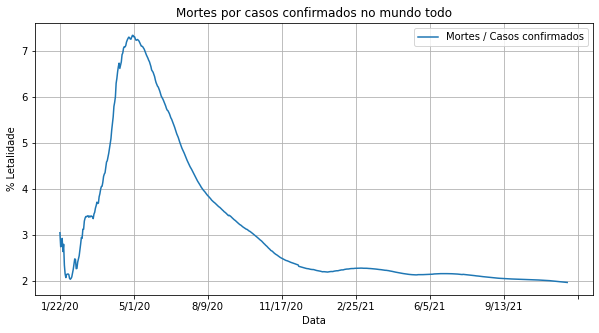

In [115]:
fig = plt.figure(figsize=(10,5))
ax = grouped_per_day["letality_rate_1"].plot()
plt.legend(['Mortes / Casos confirmados'])
plt.title("Mortes por casos confirmados no mundo todo")
plt.grid(linestyle='-')
ax.set_xlabel("Data")
ax.set_ylabel("% Letalidade")
plt.show()